# Activity Tutorial

This Jupyter notebook is designed to deepen your understanding of mixing behaviors in solutions, focusing on both theoretical models and practical applications. We will explore ideal and non-ideal mixing rules, differentiate between mass-based and molar-based approaches, and introduce the kappa value parameterization for predicting water activity.

## Introduction to Mixing Rules

Mixing rules are essential for predicting the properties of solutions, including their thermodynamic behavior and phase equilibria. In this notebook, we will:

- **Define and compare different mixing rules:** Understand how various rules apply to different types of solutions.
- **Mass-Based vs. Molar-Based Mixing:** Discuss the implications of choosing mass-based or molar-based calculations for different applications.
- **Kappa Value based Activity:** Learn about the kappa value parameterization and its role in modeling water activity in non-ideal solutions.

## Structure of the Notebook

1. **Mass-Based vs. Molar-Based vs. Volueme-Based**
   - Definitions and when to use each method
   - Examples and comparative analysis

2. **Kappa Value Parameterization**
   - Theory behind kappa values
   - Practical exercises on calculating water activity

In [1]:
# In Colab uncomment the following command to install particula:
#!pip install particula[extra] --quiet
import numpy as np
import matplotlib.pyplot as plt

import particula as par

## Mass Arrays

First we'll need to create some mass concentration arrays to use in our examples. We will use a 2-component and 3-component system for demonstration purposes.

In each the first component is water and the second component is a solute. The mass fractions of the solute will be varied to demonstrate the different mixing rules.

In [2]:
masses_1 = np.linspace(0, 100, 1000)
masses_2 = np.full_like(masses_1, 30)
masses_3 = np.linspace(150, 10, 1000)

density_1 = 1000  # kg/m^3
density_2 = 2000  # kg/m^3
density_3 = 1500  # kg/m^3

molar_mass_1 = 18.01528e-3  # g/mol
molar_mass_2 = 200e-3  # g/mol
molar_mass_3 = 150e-3  # g/mol

mass_2component = np.column_stack((masses_1, masses_2))
mass_3component = np.column_stack((masses_1, masses_2, masses_3))

density_2component = np.array([density_1, density_2])
density_3component = np.array([density_1, density_2, density_3])

# get mole fractions
mass_fractions_2component = par.particles.get_mole_fraction_from_mass(
    mass_2component, molar_masses=np.array([molar_mass_1, molar_mass_2])
)
mass_fractions_3component = par.particles.get_mole_fraction_from_mass(
    mass_3component,
    molar_masses=np.array([molar_mass_1, molar_mass_2, molar_mass_3]),
)

## Molar-Based Mixing

The ideal in this context refers to all the activity coefficients being equal to 1. This is the simplest case and is often used as a reference point for more complex models. In this case, then we are just mixing based on molar fractions.


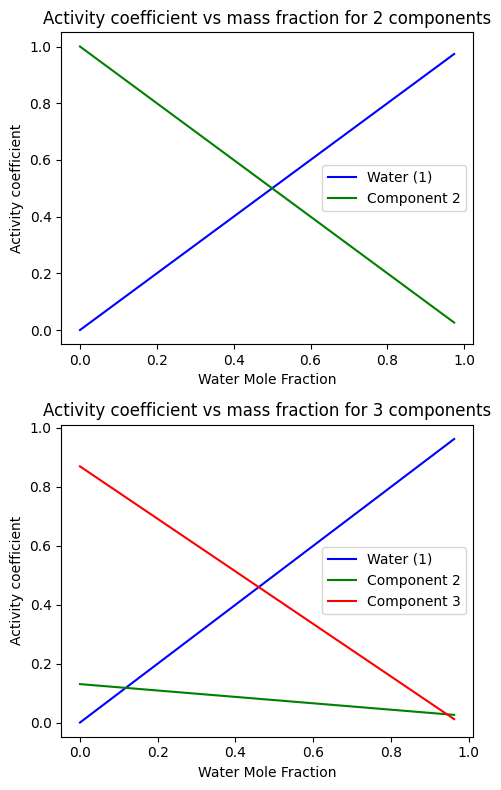

In [3]:
activity_2component_molar = par.particles.get_ideal_activity_molar(
    mass_concentration=mass_2component,
    molar_mass=np.array([molar_mass_1, molar_mass_2]),
)


activity_3component_molar = par.particles.get_ideal_activity_molar(
    mass_concentration=mass_3component,
    molar_mass=np.array([molar_mass_1, molar_mass_2, molar_mass_3]),
)


# Create the figure and axis objects
fig, ax = plt.subplots(2, 1, figsize=(5, 8))

# Plot each component in the 2-component system with separate colors
ax[0].plot(
    mass_fractions_2component[:, 0],
    activity_2component_molar[:, 0],
    color="blue",
    label="Water (1)",
)
ax[0].plot(
    mass_fractions_2component[:, 0],
    activity_2component_molar[:, 1],
    color="green",
    label="Component 2",
)
ax[0].set_xlabel("Water Mole Fraction")
ax[0].set_ylabel("Activity coefficient")
ax[0].set_title("Activity coefficient vs mass fraction for 2 components")
ax[0].legend()

# Plot the 3-component system without setting specific colors
ax[1].plot(
    mass_fractions_3component[:, 0],
    activity_3component_molar[:, 0],
    label="Water (1)",
    color="blue",
)
ax[1].plot(
    mass_fractions_3component[:, 0],
    activity_3component_molar[:, 1],
    label="Component 2",
    color="green",
)
ax[1].plot(
    mass_fractions_3component[:, 0],
    activity_3component_molar[:, 2],
    label="Component 3",
    color="red",
)
ax[1].set_xlabel("Water Mole Fraction")
ax[1].set_ylabel("Activity coefficient")
ax[1].set_title("Activity coefficient vs mass fraction for 3 components")
ax[1].legend()

# Display the plot
plt.tight_layout()
plt.show()

## Volume-Based Mixing

In this next example, we will use volume-based mixing. This is common for use with liquid mixtures, where the volume of the solution is the sum of the volumes of the components. This is a simple way to mix solutions, but it is not always accurate.

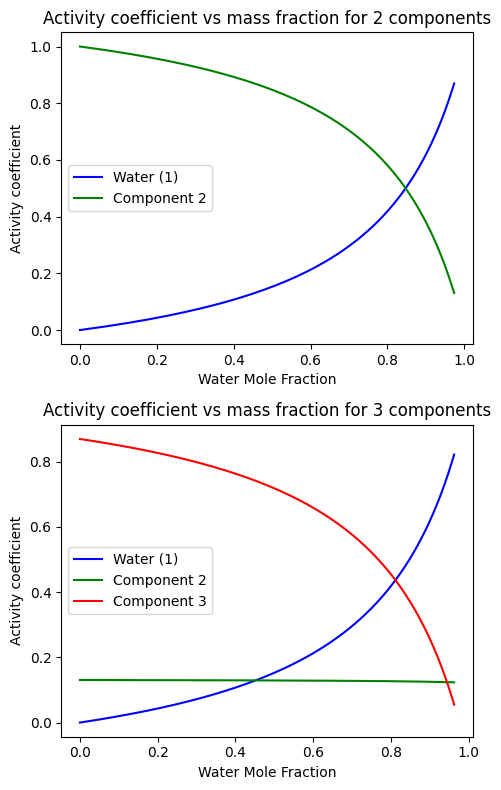

In [4]:
# Volume activity coefficient
activity_2component_volume = par.particles.get_ideal_activity_volume(
    mass_concentration=mass_2component,
    density=density_2component,
)

activity_3component_volume = par.particles.get_ideal_activity_volume(
    mass_concentration=mass_3component,
    density=density_3component,
)

# Create the figure and axis objects
fig, ax = plt.subplots(2, 1, figsize=(5, 8))

# Plot each component in the 2-component system with separate colors
ax[0].plot(
    mass_fractions_2component[:, 0],
    activity_2component_volume[:, 0],
    color="blue",
    label="Water (1)",
)
ax[0].plot(
    mass_fractions_2component[:, 0],
    activity_2component_volume[:, 1],
    color="green",
    label="Component 2",
)
ax[0].set_xlabel("Water Mole Fraction")
ax[0].set_ylabel("Activity coefficient")
ax[0].set_title("Activity coefficient vs mass fraction for 2 components")
ax[0].legend()

# Plot the 3-component system without setting specific colors
ax[1].plot(
    mass_fractions_3component[:, 0],
    activity_3component_volume[:, 0],
    label="Water (1)",
    color="blue",
)
ax[1].plot(
    mass_fractions_3component[:, 0],
    activity_3component_volume[:, 1],
    label="Component 2",
    color="green",
)
ax[1].plot(
    mass_fractions_3component[:, 0],
    activity_3component_volume[:, 2],
    label="Component 3",
    color="red",
)
ax[1].set_xlabel("Water Mole Fraction")
ax[1].set_ylabel("Activity coefficient")
ax[1].set_title("Activity coefficient vs mass fraction for 3 components")
ax[1].legend()

# Display the plot
plt.tight_layout()
plt.show()

## Mass-Based Mixing

In this example, we will use mass-based mixing. This is the simplest, as our mass fractions are directly proportional to the mass of the components.

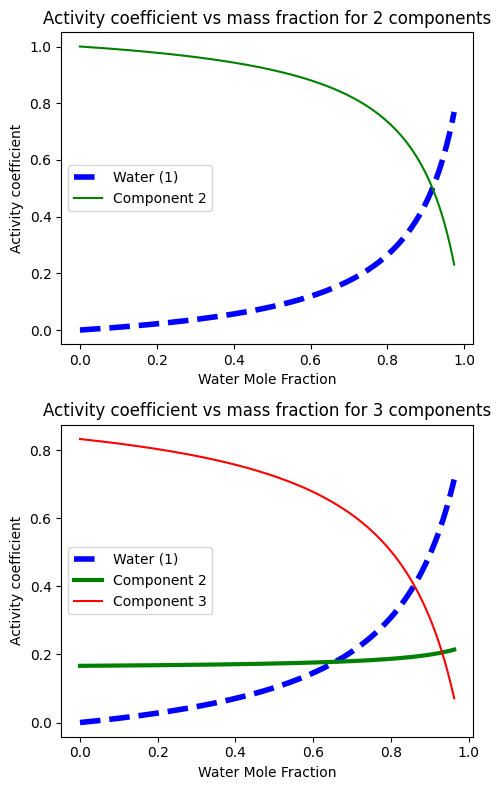

In [5]:
# Mass activity coefficient
activity_2component_mass = par.particles.get_ideal_activity_mass(
    mass_concentration=mass_2component,
)
activity_3component_mass = par.particles.get_ideal_activity_mass(
    mass_concentration=mass_3component,
)

# Create the figure and axis objects
fig, ax = plt.subplots(2, 1, figsize=(5, 8))

# Plot each component in the 2-component system with separate colors
ax[0].plot(
    mass_fractions_2component[:, 0],
    activity_2component_mass[:, 0],
    color="blue",
    label="Water (1)",
    linewidth=4,
    linestyle="--",
)
ax[0].plot(
    mass_fractions_2component[:, 0],
    activity_2component_mass[:, 1],
    color="green",
    label="Component 2",
)
ax[0].set_xlabel("Water Mole Fraction")
ax[0].set_ylabel("Activity coefficient")
ax[0].set_title("Activity coefficient vs mass fraction for 2 components")
ax[0].legend()

# Plot the 3-component system without setting specific colors
ax[1].plot(
    mass_fractions_3component[:, 0],
    activity_3component_mass[:, 0],
    label="Water (1)",
    color="blue",
    linewidth=4,
    linestyle="--",
)
ax[1].plot(
    mass_fractions_3component[:, 0],
    activity_3component_mass[:, 1],
    label="Component 2",
    color="green",
    linewidth=3,
)
ax[1].plot(
    mass_fractions_3component[:, 0],
    activity_3component_mass[:, 2],
    label="Component 3",
    color="red",
)
ax[1].set_xlabel("Water Mole Fraction")
ax[1].set_ylabel("Activity coefficient")
ax[1].set_title("Activity coefficient vs mass fraction for 3 components")
ax[1].legend()

# Display the plot
plt.tight_layout()
plt.show()

## Kappa-Activity

The kappa value parameterization is a simple way to model non-ideal water interactions in solutions.

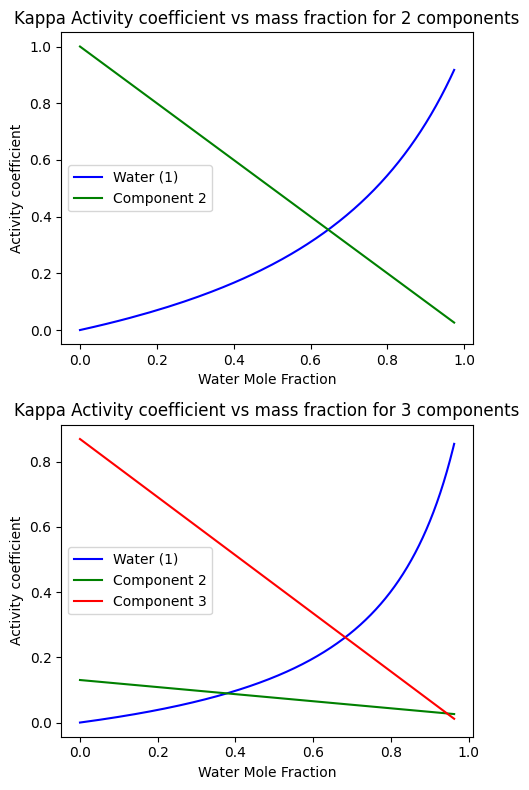

In [6]:
# kappa activity coefficient

kappa_1 = 0.0  # kappa of water
kappa_2 = 0.6  # kappa of component 2
kappa_3 = 1.2  # kappa of component 3

water_index = 0

activity_2component_kappa = par.particles.get_kappa_activity(
    mass_concentration=mass_2component,
    kappa=np.array([kappa_1, kappa_2]),
    density=density_2component,
    molar_mass=np.array([molar_mass_1, molar_mass_2]),
    water_index=water_index,
)
activity_3component_kappa = par.particles.get_kappa_activity(
    mass_concentration=mass_3component,
    kappa=np.array([kappa_1, kappa_2, kappa_3]),
    density=density_3component,
    molar_mass=np.array([molar_mass_1, molar_mass_2, molar_mass_3]),
    water_index=water_index,
)

# Create the figure and axis objects
fig, ax = plt.subplots(2, 1, figsize=(5, 8))

# Plot each component in the 2-component system with separate colors
ax[0].plot(
    mass_fractions_2component[:, 0],
    activity_2component_kappa[:, 0],
    color="blue",
    label="Water (1)",
)
ax[0].plot(
    mass_fractions_2component[:, 0],
    activity_2component_kappa[:, 1],
    color="green",
    label="Component 2",
)
ax[0].set_xlabel("Water Mole Fraction")
ax[0].set_ylabel("Activity coefficient")
ax[0].set_title("Kappa Activity coefficient vs mass fraction for 2 components")
ax[0].legend()

# Plot the 3-component system without setting specific colors
ax[1].plot(
    mass_fractions_3component[:, 0],
    activity_3component_kappa[:, 0],
    label="Water (1)",
    color="blue",
)
ax[1].plot(
    mass_fractions_3component[:, 0],
    activity_3component_kappa[:, 1],
    label="Component 2",
    color="green",
)
ax[1].plot(
    mass_fractions_3component[:, 0],
    activity_3component_kappa[:, 2],
    label="Component 3",
    color="red",
)
ax[1].set_xlabel("Water Mole Fraction")
ax[1].set_ylabel("Activity coefficient")
ax[1].set_title("Kappa Activity coefficient vs mass fraction for 3 components")
ax[1].legend()

# Display the plot
plt.tight_layout()
plt.show()

## Summary

By the end of this notebook, you should have a better understanding of mixing rules, mass-based vs. molar-based calculations, and the kappa value parameterization for predicting water activity in non-ideal solutions. You will also have learned how to apply these concepts to practical examples and visualize the results using plots.

You saw how different mixing rules can be used to predict the properties of solutions and how they can affect the accuracy of the predictions. You also learned about the kappa value parameterization and how it can be used to model water activity in non-ideal solutions. These concepts are essential for condensation and phase equilibrium calculations when aerosol particles are present in the atmosphere.